In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
df = pd.read_excel("SlimeMoldData.xlsx")
df.head()


,run_number,prob_random,Difficulty,prob-reproduce,num-agents,prob_static,final_food_dist,min_food_dist,max_food_dist,mean_food_dist,steps
0,1,0.0,Easy,0.0,1000,0.0,2.648812,2.645598,5.202272,3.083614,50
1,2,0.0,Easy,0.0,1000,0.1,3.151663,0.000000,5.089360,3.410997,50
2,3,0.0,Easy,0.0,1000,0.2,2.790092,0.000000,5.149026,3.231751,50
3,4,0.0,Easy,0.0,1000,0.3,2.170172,0.000000,4.865522,2.843332,50
4,5,0.0,Easy,0.0,1000,0.4,2.756521,2.756521,4.997371,3.323032,50


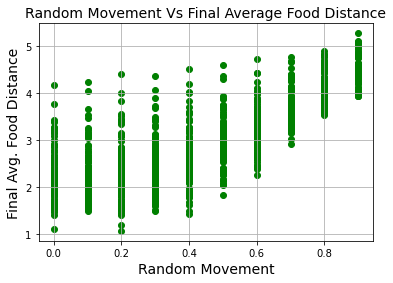

In [8]:
plt.scatter(df['prob_random'], df['final_food_dist'], color='green')
plt.title('Random Movement Vs Final Average Food Distance', fontsize=14)
plt.xlabel('Random Movement', fontsize=14)
plt.ylabel('Final Avg. Food Distance', fontsize=14)
plt.grid(True)
plt.show()

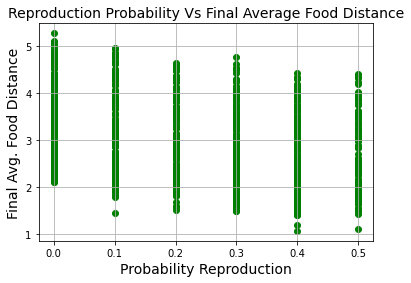

In [9]:
plt.scatter(df['prob-reproduce'], df['final_food_dist'], color='green')
plt.title('Reproduction Probability Vs Final Average Food Distance', fontsize=14)
plt.xlabel('Probability Reproduction', fontsize=14)
plt.ylabel('Final Avg. Food Distance', fontsize=14)
plt.grid(True)
plt.show()

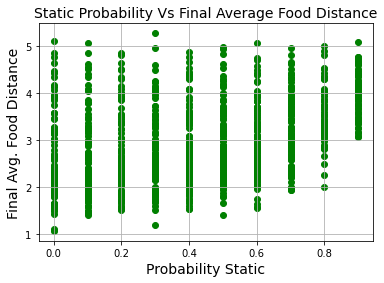

In [10]:
plt.scatter(df['prob_static'], df['final_food_dist'], color='green')
plt.title('Static Probability Vs Final Average Food Distance', fontsize=14)
plt.xlabel('Probability Static', fontsize=14)
plt.ylabel('Final Avg. Food Distance', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
X = df[['prob_random','prob-reproduce', "prob_static", ]] #3 variables for multiple regression. 
Y = df['final_food_dist']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

# for i in range(500)
New_Prob_Random = 0
New_Prob_Reproduce = 0
New_Prob_Static = 0

print("Predicted Final Food Distance for Random_Prob = Reproduction_Prob = Prob_Static = 0:\n", regr.predict([[New_Prob_Random,New_Prob_Reproduce,New_Prob_Static]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 1.8157215445743937
Coefficients: [ 2.49673381 -1.75968457  1.20861158]
Predicted Final Food Distance for Random_Prob = Reproduction_Prob = Prob_Static = 0:
 [1.81572154]
                            OLS Regression Results                            
Dep. Variable:        final_food_dist   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1465.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:33:50   Log-Likelihood:                -388.13
No. Observations:                 920   AIC:                             784.3
Df Residuals:                     916   BIC:                             803.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    